<a href="https://colab.research.google.com/github/megajoules8/data_science_worksheets/blob/main/salary_distribution_project4_alt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("fivethirtyeight")

In [ ]:
np.random.seed(0) #generates deterministic pseudorandom number sequence
num_samples = 5000

In [ ]:
#generate some fake data that has similar properties to data given.
#from 200, we want to sample a list of probabilities to say which age category does a person belong to
#want to have a way to generate a salery for a person given their age

In [ ]:
people_data = pd.Series([105770 , 1170176 , 1797410 , 1256255 , 629903 , 88260 , 7362], index=['<=20', '21-30', '31-40', '41-50', '51-60', '61-65', '>=66'])
people_data= people_data/people_data.sum() #normalize
values_sample = np.random.choice(people_data.index, size =num_samples, replace=True, p=people_data.values)

df = pd.DataFrame(
{"number of individuals" :  pd.Series(values_sample).value_counts(),
"mean" : [17487 , 32481 , 47044 , 56863 , 59514 , 76572 , 114779],
"sd" : [7459 , 18207 , 37225 , 65919 , 103232 , 137916 , 360839]},
index = ['<=20', '21-30', '31-40', '41-50', '51-60', '61-65', '>=66'])

df.fillna(0) #because apparently old people die (make code resiliant in case you change the random seed)

,number of individuals,mean,sd
<=20,110,17487,7459
21-30,1145,32481,18207
31-40,1815,47044,37225
41-50,1202,56863,65919
51-60,645,59514,103232
61-65,77,76572,137916
>=66,6,114779,360839


In [ ]:
#create a function that generates random salaries

#sigma * z + mu = x
salary = np.random.normal(loc=0, scale=1, size=num_samples) #creating scaleable normal dist
longform = pd.DataFrame(values_sample, columns= ['age'])

In [ ]:
population_sample_data = pd.merge(left = longform , right = df , how ='left' , left_on= 'age', right_index=True, validate = 'm:1' )
population_sample_data

,age,number of individuals,mean,sd
0,31-40,1815,47044,37225
1,41-50,1202,56863,65919
2,31-40,1815,47044,37225
3,31-40,1815,47044,37225
4,31-40,1815,47044,37225
...,...,...,...,...
4995,21-30,1145,32481,18207
4996,21-30,1145,32481,18207
4997,21-30,1145,32481,18207
4998,31-40,1815,47044,37225


In [ ]:
population_sample_data['z'] = salary

In [ ]:
population_sample_data

,age,number of individuals,mean,sd,z,salary
0,31-40,1815,47044,37225,-1.421904,0.000000
1,41-50,1202,56863,65919,-0.936009,0.000000
2,31-40,1815,47044,37225,-0.196557,39727.156576
3,31-40,1815,47044,37225,-0.574988,25640.077754
4,31-40,1815,47044,37225,0.750483,74980.712449
...,...,...,...,...,...,...
4995,21-30,1145,32481,18207,0.592046,43260.379620
4996,21-30,1145,32481,18207,0.009057,32645.892192
4997,21-30,1145,32481,18207,-0.886322,16343.738545
4998,31-40,1815,47044,37225,0.049100,48871.740305


In [ ]:
population_sample_data['salary'] = population_sample_data['sd']*population_sample_data['z'] + population_sample_data['mean']

In [ ]:
population_sample_data.query('salary<0')

,age,number of individuals,mean,sd,z,salary
0,31-40,1815,47044,37225,-1.421904,-5886.362823
1,41-50,1202,56863,65919,-0.936009,-4837.810135
7,51-60,645,59514,103232,-1.010546,-44806.706225
10,41-50,1202,56863,65919,-1.672445,-53382.874768
13,51-60,645,59514,103232,-1.690998,-115051.080947
...,...,...,...,...,...,...
4953,41-50,1202,56863,65919,-1.576701,-47071.535487
4970,41-50,1202,56863,65919,-1.230211,-24231.309830
4976,51-60,645,59514,103232,-0.965247,-40130.342272
4983,41-50,1202,56863,65919,-1.110897,-16366.222048


In [ ]:
population_sample_data['salary'] = population_sample_data['salary'].clip(lower=0)
population_sample_data

,age,number of individuals,mean,sd,z,salary
0,31-40,1815,47044,37225,-1.421904,0.000000
1,41-50,1202,56863,65919,-0.936009,0.000000
2,31-40,1815,47044,37225,-0.196557,39727.156576
3,31-40,1815,47044,37225,-0.574988,25640.077754
4,31-40,1815,47044,37225,0.750483,74980.712449
...,...,...,...,...,...,...
4995,21-30,1145,32481,18207,0.592046,43260.379620
4996,21-30,1145,32481,18207,0.009057,32645.892192
4997,21-30,1145,32481,18207,-0.886322,16343.738545
4998,31-40,1815,47044,37225,0.049100,48871.740305


In [ ]:
pd.Series(population_sample_data['salary']).describe()

count      5000.000000
mean      52064.613427
std       48605.749816
min           0.000000
25%       17670.206484
50%       41381.744888
75%       72513.994496
max      340431.627783
Name: salary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


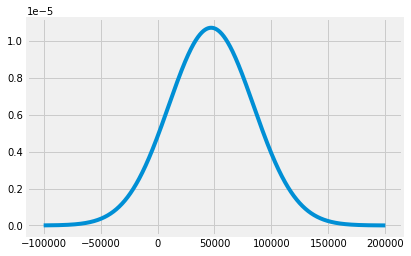

In [ ]:
ex = np.linspace(-100000, 200000 , 300001)
pdf= sps.norm.pdf(ex , loc = population_sample_data['mean'].iloc[0] , scale = population_sample_data['sd'].iloc[0] )
sns.lineplot(ex , pdf)

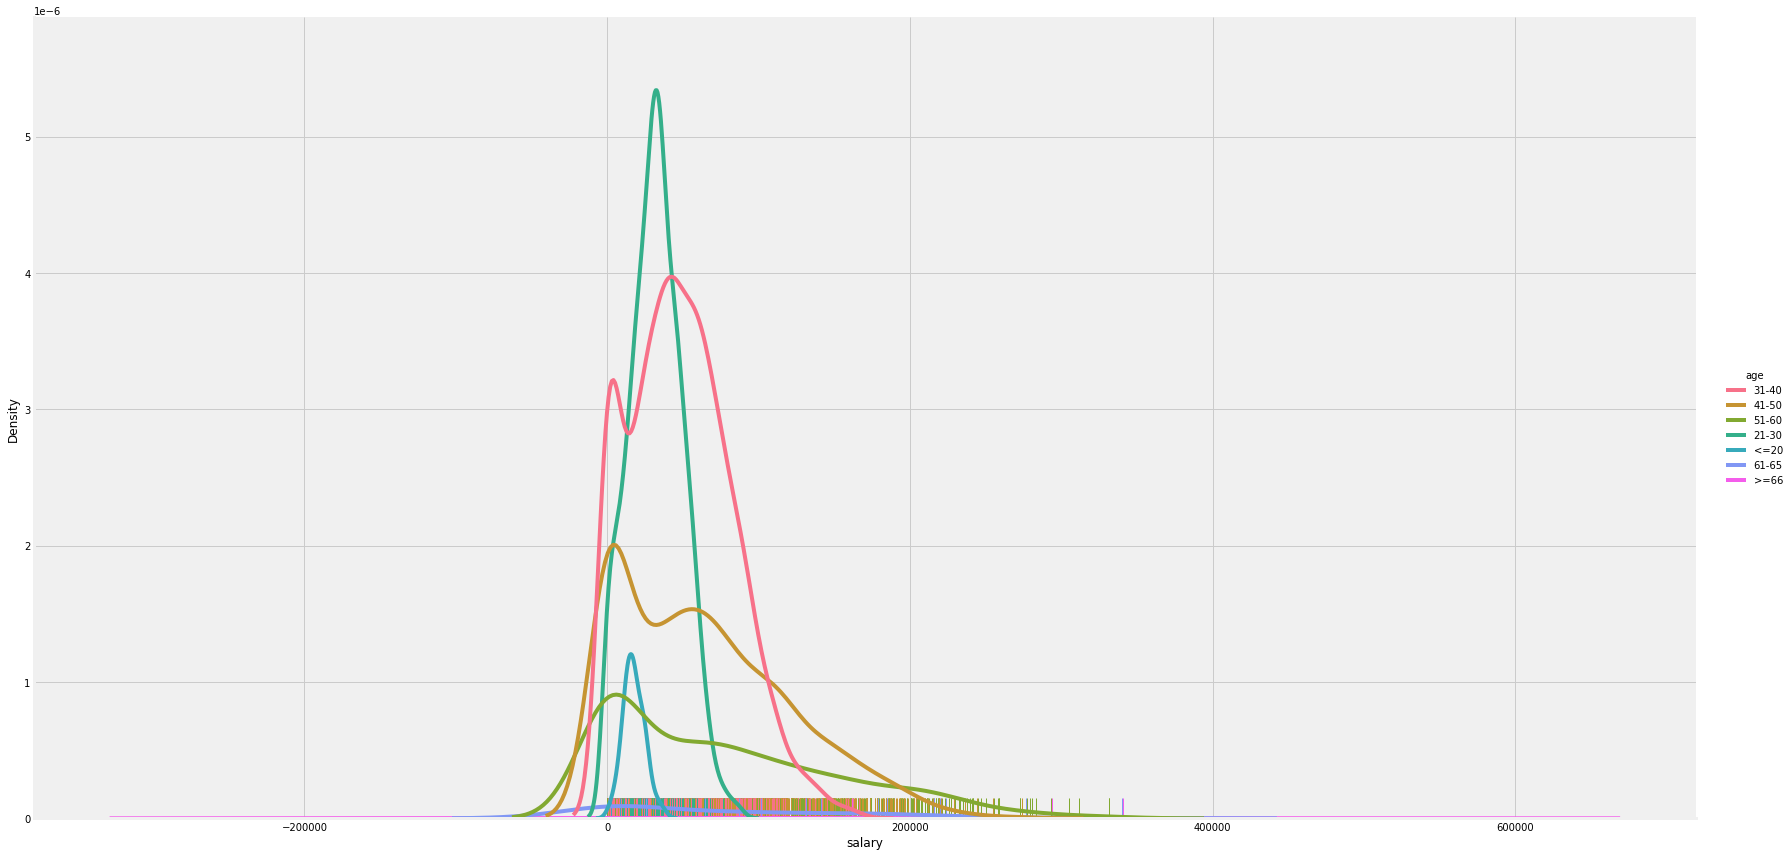

In [ ]:
sns.displot(x='salary', data = population_sample_data , hue= 'age', kind = 'kde', aspect = 2 , rug = True , height = 12)

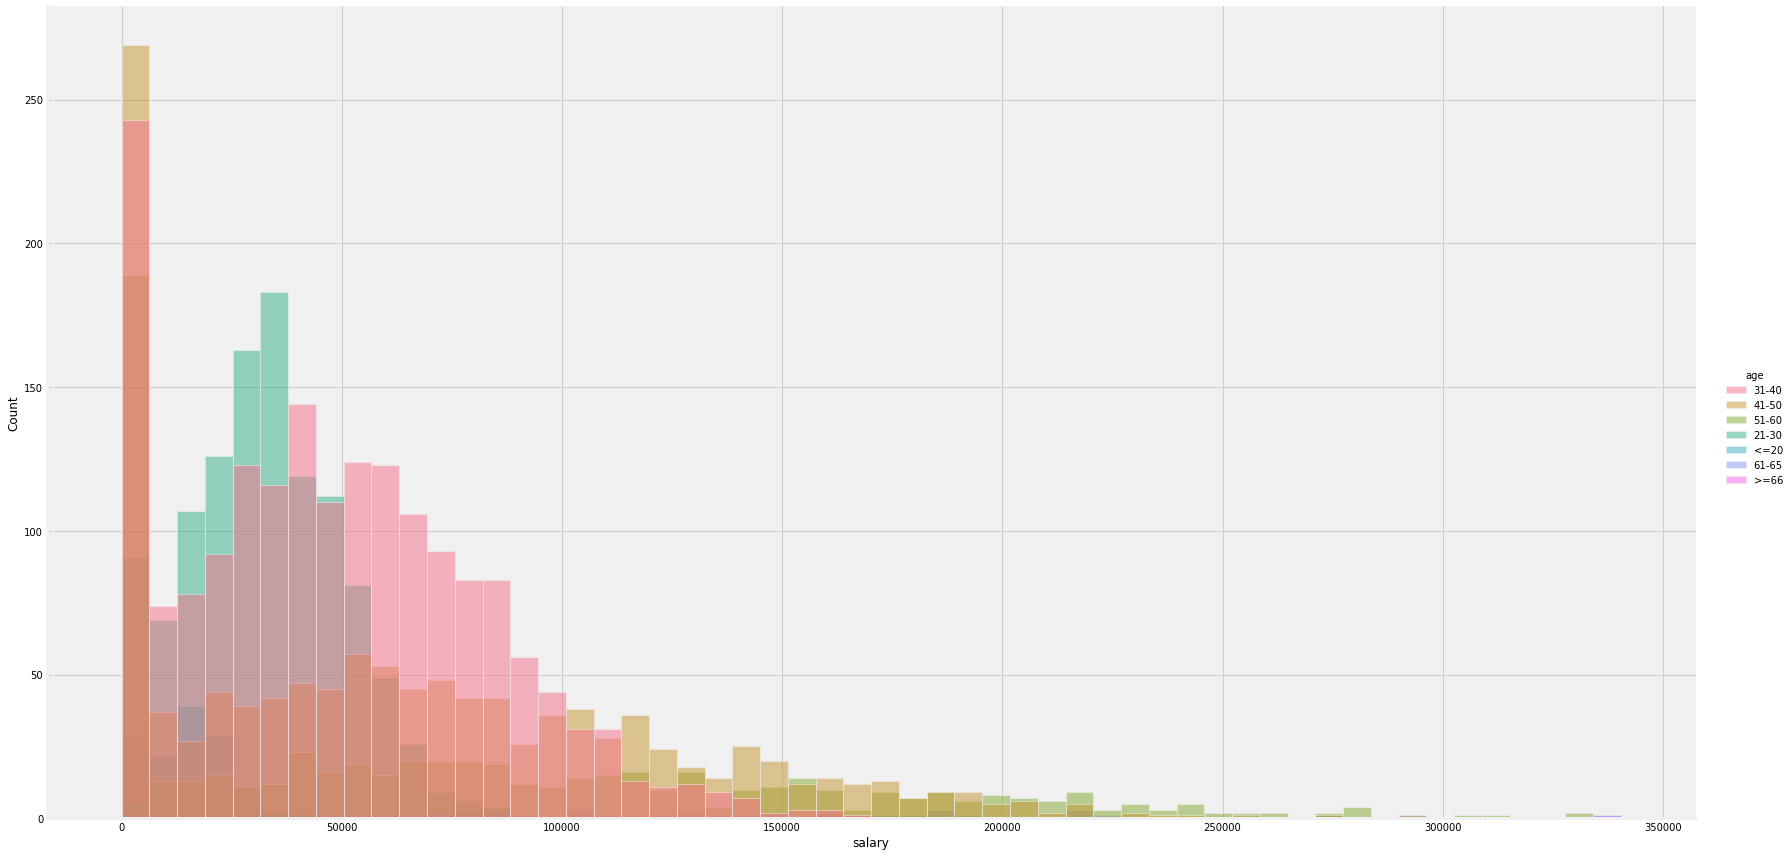

In [ ]:
sns.displot(x='salary', data = population_sample_data , hue= 'age', aspect = 2 ,height = 12)